In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
tight = pd.read_csv(r"C:\Users\BATCOMP\Downloads\Titanic\titanic_data.csv")

In [3]:
tight.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
number = LabelEncoder()
tight['Sex'] = number.fit_transform((tight['Sex'].astype('str')))

In [5]:
tight['Cabin'] = number.fit_transform(tight['Cabin'].astype('str'))

In [6]:
tight.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,S


In [7]:
print((tight['Cabin'] == 147).sum())

687


In [8]:
correl = tight.corr('pearson')
correl['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Cabin         -0.254888
Name: Survived, dtype: float64

In [9]:
tight['Embarked'] = number.fit_transform(tight['Embarked'].astype('str'))
tight.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


In [10]:
correl = tight.corr('pearson')
correl['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex           -0.543351
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Cabin         -0.254888
Embarked      -0.163517
Name: Survived, dtype: float64

In [11]:
tight = tight.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis = 1)

In [12]:
X = tight
X = (X-X.min())/(X.max()-X.min())

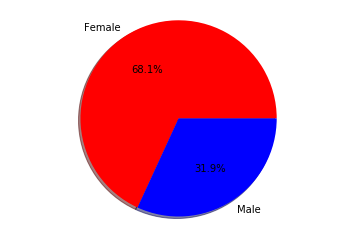

In [13]:
survived = X[X['Survived'] == 1].Sex.value_counts()
colors = 'red', 'blue'
labels = 'Female', 'Male'
plt.pie(survived, labels = labels, colors = colors, autopct='%1.1f%%', shadow = True)
plt.axis('equal')
plt.xticks(rotation = 0)
plt.show()

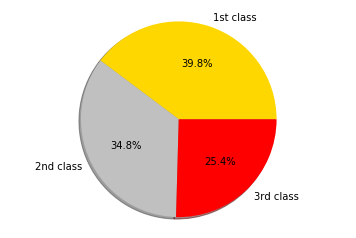

In [14]:
passenger_class = X[X['Survived']==1].Pclass.value_counts()
labels = '1st class', '2nd class', '3rd class'
color = 'gold', 'silver', 'red'
plt.pie(passenger_class, labels = labels, colors = color, autopct = "%1.1f%%", shadow = True)
plt.xticks(rotation = 0)
plt.axis('equal')
plt.show()

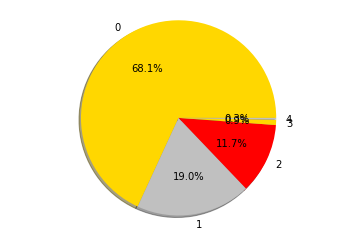

In [15]:
survived2 = X[X['Survived']==1].Parch.value_counts()
labels = ['0', '1', '2', '3', '4']
color = 'gold', 'silver', 'red'
plt.pie(survived2, labels = labels, colors = color, autopct = "%1.1f%%", shadow = True)
plt.xticks(rotation = 0)
plt.axis('equal')
plt.show()

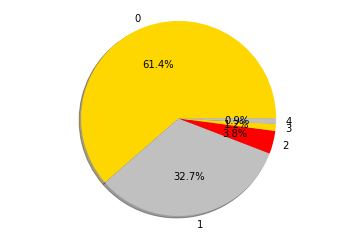

In [16]:
survived3 = X[X['Survived']==1].SibSp.value_counts()
labels = ['0', '1', '2', '3', '4']
color = 'gold', 'silver', 'red'
plt.pie(survived3, labels = labels, colors = color, autopct = "%1.1f%%", shadow = True)
plt.xticks(rotation = 0)
plt.axis('equal')
plt.show()

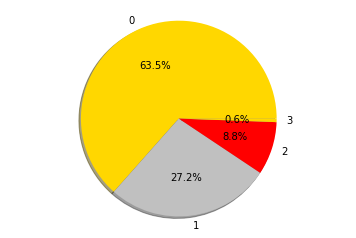

In [17]:
survived4 = X[X['Survived']==1].Embarked.value_counts()
labels = ['0', '1', '2', '3']
color = 'gold', 'silver', 'red'
plt.pie(survived4, labels = labels, colors = color, autopct = "%1.1f%%", shadow = True)
plt.xticks(rotation = 0)
plt.axis('equal')
plt.show()

In [19]:
f1 = 'Sex'
f2 = 'Pclass'
f3 = 'SibSp'
f4 = 'Parch'

X1 = X[f1]
X2 = X[f2]
X4 = X[f4]
X3 = X[f3]
Y = X['Survived']

x1 = np.array(X1)
x2 = np.array(X2)
x4 = np.array(X4)
x3 = np.array(X3)
y = np.array(Y)


In [20]:
x1train, x1test, x2train, x2test, x3train, x3test, x4train, x4test, ytrain, ytest = train_test_split(x1, x2, x3, x4, y, test_size = 0.2) 

In [21]:
def hyp(a, x1, b):
    return 1/(1+np.exp(-1*(a*np.power(x1, 2) + b)))

In [22]:
def error(a, x1, b, y):
    err = 0
    m = len(x1)
    
    for i in range(m):
        err += (-1*(y[i]*np.log(hyp(a, x1[i], b))) - (1-y[i])*(np.log(1 - hyp(a, x1[i], b))))
        
    return (1/m)*err

In [23]:
def step_grad(a, x1, b, y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    grad_d = 0
    grad_e = 0
    
    m = len(x1)
    
    for i in range(m):
        grad_a += (hyp(a, x1[i], b) - y[i])*np.power(x1[i],2)
        grad_b += (hyp(a, x1[i], b) - y[i])
#         grad_c += (hyp(a, x1[i], b, x2[i], c) - y[i])
#         grad_d += (hyp(a, x1[i], b, x2[i], c, x3[i], d, x4[i], e) - y[i])*x4[i]
#         grad_e += (hyp(a, x1[i], b, x2[i], c, x3[i], d, x4[i], e) - y[i])
                   
    a = a - (grad_a*learning_rate)
    b = b - (grad_b*learning_rate)
#     c = c - (grad_c*learning_rate)
#     d = d - (grad_d*learning_rate)
#     e = e - (grad_e*learning_rate)
    
    
    return a, b

In [24]:
def descnd(init_a, x1, init_b, y, learning_rate, iteration):
    a = init_a
    b = init_b
#     c = init_c
#     d = init_d
#     e = init_e
    
    for i in range(iteration):
        err = error(a, x1, b, y)
        
        if i % 1000 == 0:
            print("error = %f, a = %.3f, b = %.3f" %(err,a,b))
            
        a, b = step_grad(a, x1, b, y, learning_rate)
        
    return a, b

In [25]:
def accuracy(a, x1, b, y):
    correct = 0
    m = len(x1)
    
    for i in range(m):
        pred = hyp(a, x1[i], b)
        
        if pred>0.5:
            z = 1
        else:
            z = 0
            
        if y[i] == z:
            correct += 1
            
    print(f"Accuracy = {correct/len(y)}")

In [26]:
a = -2.595
b = 1.109
c = 0
d = 0
e = 0

learning_rate = 0.0001
iteration = 5000

In [27]:
final_a, final_b = descnd(a, x1train, b, ytrain, learning_rate, iteration)

error = 0.519487, a = -2.595, b = 1.109
error = 0.519020, a = -2.528, b = 1.135
error = 0.519020, a = -2.523, b = 1.131
error = 0.519020, a = -2.523, b = 1.131
error = 0.519020, a = -2.523, b = 1.131


In [28]:
accuracy(final_a, x1train, final_b, ytrain)

Accuracy = 0.7851123595505618


In [29]:
accuracy(final_a, x1test, final_b, ytest)

Accuracy = 0.7932960893854749


In [30]:
error(final_a, x1train,final_b,ytrain)

0.519019742148697

In [31]:
error(final_a, x1test, final_b, ytest)

0.5012034546332022

In [32]:
# 1. Sigmoid / Logistic Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1-x)

# 2. Hyperbolic Tan Function
def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1.0 - (np.power(np.tanh(x),2))

# 3. softplus function 
def softplus(x):
    return np.log(1+np.exp(x))

def dsoftplus(x):
    return 1/(1+np.exp(x))

In [33]:
def feed_forward(data_in, w0,w1,w2, w3, b0,b1,b2,b3):
    '''
    The Feed-forward considers 5 layers including input and output layer.
    
    The output layer/neuron is a classification node.
    
    returns: state of each layer
    '''
    layer0 = data_in
    layer1 = tanh(np.dot(layer0, w0)+b0)
    layer2 = sigmoid(np.dot(layer1, w1)+b1)
    layer3 = tanh(np.dot(layer2, w2)+b2)
    layer4 = softplus(np.dot(layer3, w3)+b3)

    return layer0, layer1, layer2, layer3, layer4

In [34]:
def backpropogate(i, layer0, layer1, layer2, layer3, layer4, actual_y, w0,w1,w2,w3,b0,b1,b2,b3, learning_rate):
    '''
    This backpropogate is only slightly different from a regular classifier
    in ways in which the output layer gradient is calculated.
    
    Since the output layer is not a function of any activation function,
    the delta doesn't need to be multiplied with the transfer derivative of the
    output layer.
    
    The rest is all the same.
    
    returns: weights and bias matrices
    '''
    l4_error = layer4 - actual_y
    l4_delta = l4_error * dsoftplus(layer4)
    dh4 = np.dot(layer3.T, l4_delta)
    
    l3_error = l4_delta.dot(w3.T)
    l3_delta = l3_error * dtanh(layer3)
    dh3 = np.dot(layer2.T, l3_delta)
    
    l2_error = l3_delta.dot(w2.T)
    l2_delta = l2_error * dsigmoid(layer2)
    dh2 = np.dot(layer1.T, l2_delta)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * dtanh(layer1)
    dh1 = np.dot(layer0.T, l1_delta)
    
    w3 = w3 - (learning_rate * dh4)
    w2 = w2 - (learning_rate * dh3)
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
    
    b3 = b3 - (learning_rate * np.mean(l4_delta))
    b2 = b2 - (learning_rate * np.mean(l3_delta))
    b1 = b1 - (learning_rate * np.mean(l2_delta))
    b0 = b0 - (learning_rate * np.mean(l1_delta))    
   
    if i%10==0 and (i!=0):
        loss = np.mean(np.power(layer4-actual_y, 2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%100 == 0:
            print("\n", int(i), loss)

        
    return w0, w1,w2,w3, b0,b1,b2,b3

In [35]:
def accuracy(testx, testy):
    correct = 0
    layer0, layer1, layer2, layer3, layer4 = feed_forward(testx,w0, w1,w2,w3, b0,b1,b2,b3)
    for i in range(len(testx)):
        if np.argmax(layer4[i]) == np.argmax(testy[i]):
            correct +=1 
            
    return f"Accuracy: {correct*100/len(testy)}%"

In [36]:
target_list = []
for i in tight.Survived:
    op = [0,0]
    op[i] = 1
    target_list.append(op)
    
y = target_list

In [37]:
X1=X
X1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.666667
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,0.000000
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,0.666667
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,0.666667
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,0.666667


In [38]:
X1.fillna(X.mean(),inplace=True)

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(X1.values,y, test_size=0.8)

In [40]:
np.random.seed(0)
w0 = np.random.random((8,6))
w1 = np.random.random((6,5))
w2 = np.random.random((5, 3))
w3 = np.random.random((3,2))

b0 = np.random.random((1,1))-1
b1 = np.random.random((1,1))-1
b2 = np.random.random((1,1))-1
b3 = np.random.random((1,1))-1

epochs = 1000

In [41]:
# Initialising variables to track loss vs iterations so we can plot the changes
loss_curve = []
iters = []

In [42]:
for i in (range(epochs)):
    layer0, layer1, layer2, layer3, layer4 = feed_forward(xtrain, w0,w1,w2, w3, b0,b1,b2,b3)
    w0,w1,w2, w3, b0,b1,b2,b3 = backpropogate(i,layer0, layer1, layer2, layer3, layer4, ytrain, w0,w1,w2, w3, b0,b1,b2,b3, 0.001 )
    


 100 0.21377264959793135

 200 0.0525922737105482

 300 0.011481304087916392

 400 0.005763469242965879

 500 0.003920603794619687

 600 0.003003855463735219

 700 0.002454325794308652

 800 0.0020859707602506493

 900 0.0018185610688094401


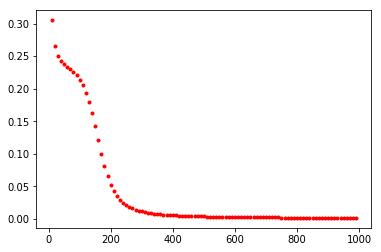

In [43]:
plt.plot(iters, loss_curve,'r.')

In [44]:
accuracy(xtrain, ytrain)

'Accuracy: 100.0%'

In [45]:
accuracy(xtest, ytest)

'Accuracy: 100.0%'